# Example of plotting APR3 data, first cell is for the functions

In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
from pyart.graph import cm
import pandas as pd
from pyproj import Proj
from pylab import rc
from scipy import interpolate
import colormaps_new as cmaps

plt.rc

models = pd.read_csv('ScatModels_Kulie.csv')
models2 = pd.read_csv('Gergely_2017.csv')
models3 = pd.read_csv('Models_Leinonen_15.csv')

fontsize=14
fontsize2=12
lw=1

##plot attributes 
plt.rc('axes', linewidth=2)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# December 1 (23:00)

In [5]:
def fig1(filename,flightnum):

    fontsize=14
    fontsize2=12
    savefig=False
    cmap = 'seismic'
    figsize=[15,15]
    surfaceon=False
    vmin_r = [-10,-10,-10,-10,-10]
    vmax_r=[45,45,45,45,45]
    NWS=True
    scan=12
    Dec2 = np.load(filename).item()
    Dec2 = Dec2[flightnum]
    fig,axes = plt.subplots(3,2,figsize=(15,7.5))

    time_dates = Dec2['matched']['time'][scan,:]
    alt = Dec2['matched']['APR_alt'][:,scan,:]

    radkey = ['APR_Ku','APR_Ka','APR_W']
    cbarLab = ['$Z_{Ku}$, [dBZ]','$Z_{Ka}$, [dBZ]','$Z_{W}$']
    
    points = np.arange(0,len(Dec2['matched']['R_c']),300)
    
    if time_dates[0] >= datetime.datetime(2015,12,18,6,45) and time_dates[0] <= datetime.datetime(2015,12,18,6,58):
        for j in np.arange(0,550):
            temp = np.ma.masked_where(time_dates >= datetime.datetime(2015,12,18,6,52),Dec2['matched']['APR_W'][j,scan,:])
            Dec2['matched']['APR_W'][j,scan,:] = temp
            temp = np.ma.masked_where(time_dates >= datetime.datetime(2015,12,18,6,52),Dec2['matched']['APR_Ku'][j,scan,:])
            Dec2['matched']['APR_Ku'][j,scan,:] = temp
            temp = np.ma.masked_where(time_dates >= datetime.datetime(2015,12,18,6,52),Dec2['matched']['APR_Ka'][j,scan,:])
            Dec2['matched']['APR_Ka'][j,scan,:] = temp
        
    for i in np.arange(0,len(radkey),1):
        ax = axes[i,0]
        key = radkey[i]
        vmin = vmin_r[i]
        vmax = vmax_r[i]
        colorbarlabel=cbarLab[i]
        radar = Dec2['matched'][radkey[i]][:,12,:]
        ind = np.isnan(radar)
        radar[ind] = np.inf
        radar = np.ma.masked_invalid(radar)

        R = Dec2['matched']['R']
        R_c = Dec2['matched']['R_c']
        alt_c = Dec2['matched']['alt_c']

        if NWS and i <= 2: 
            pm = ax.pcolormesh(R,alt/1000.,radar,vmin=vmin,vmax=vmax,cmap=cmaps.HomeyerRainbow)
        else:
            pm = ax.pcolormesh(R,alt/1000.,radar,vmin=vmin,vmax=vmax,cmap=cmap)

        if i <= 1:
            ax.set_xticklabels([])

        ax.set_ylim([0,10])
        ax.plot(R_c,alt_c/1000.,'--ok',markevery=300,markerfacecolor='w',label='Citation')

        #Clean it up
        if i == 1:
            ax.set_ylabel('Altitude, [km]',fontsize=fontsize)

        ax.tick_params(axis='both',direction='in',labelsize=fontsize2,width=2,length=5,color='k')
        ax.set_facecolor(color=[0.85,0.85,0.85])
        
        color_array = ['b','r','g','y','w','purple']
        for ii in np.arange(0,len(points)):
            ax.plot(R_c[points[ii]],alt_c[points[ii]]/1000.,'o',markeredgecolor='k',color=color_array[ii])
        
        plt.gcf().subplots_adjust(bottom=0.20)


    # cbar = plt.colorbar(pm,ax=ax,orientation="horizontal", pad=.5)
    # cbar.set_label('Reflectivity, [dBZ]',fontsize=fontsize)
    # cax = cbar.ax
    # cax.tick_params(labelsize=fontsize2)

    axes[0,0].legend(loc=9)
    axes[0,0].set_title(time_dates[0],fontsize=fontsize)
    axes[i,0].set_xlabel('Distance, [km]',fontsize=fontsize)

    
    ax = axes[0,1]

    x = models3['upedgex']
    y = models3['upedgey']
    ind = np.isnan(x)
    x = x[~ind]
    y = y[~ind]
    tck = interpolate.splrep(x, y, s=0)
    xnew = np.arange(3.58,13.25,.25)
    ynew = interpolate.splev(xnew, tck, der=0)
    x2 = models3['downedgex']
    y2 = models3['downedgey']
    ind = np.isnan(x2)
    x2 = x2[~ind]
    y2 = y2[~ind]
    tck = interpolate.splrep(x2, y2, s=0)
    ynew2 = interpolate.splev(xnew, tck, der=0)
    ax.plot(xnew,ynew,'-w',lw=lw)
    ax.plot(xnew,ynew2,'-w',lw=lw)
    p1, = ax.plot(models['X2'].values,models['Y2'].values,'-ok',lw=lw,markevery=10,ms=4,markerfacecolor='w',mew=lw)
    ax.plot(models['X2'].values[len(models['X2'].values)-26],models['Y2'].values[len(models['Y2'].values)-26],
            'ok',lw=lw,ms=4,markerfacecolor='w',mew=lw)
    p2 = ax.fill_between(xnew,ynew,ynew2,color='w',alpha=.5)
    p3, = ax.plot(models3['L00kgx'].values,models3['L00kgy'].values,'-sk',lw=lw,markevery=10,ms=4,markerfacecolor='w',mew=lw)
    ax.plot(models3['L00kgx'].values[len(models3['L00kgx'].values)-6],
            models3['L00kgy'].values[len(models3['L00kgy'].values)-6],'-sk',lw=lw,ms=4,markerfacecolor='w',mew=lw)

    p4, = ax.plot(models3['L05kgx'].values,models3['L05kgy'].values,'-*k',lw=lw,markevery=9,ms=7,markerfacecolor='w',mew=lw)
    ax.plot(models3['L05kgx'].values[len(models3['L05kgx'].values)-10],
            models3['L05kgy'].values[len(models3['L05kgy'].values)-10],'-*k',lw=lw,ms=7,markerfacecolor='w',mew=lw)



    p5, = ax.plot(models3['L1kgx'].values,models3['L1kgy'].values,'-->k',lw=lw,markevery=9,ms=5,markerfacecolor='w',mew=lw)
    ax.plot(models3['L1kgx'].values[len(models3['L1kgx'].values)-11],
            models3['L1kgy'].values[len(models3['L1kgy'].values)-11],'-->k',lw=lw,ms=5,markerfacecolor='w',mew=lw)

    ax.legend([p1,p2,p3,p4,p5],['PH10_D','L15_S','L15_00','L15_05','L15_10'],fontsize=fontsize2,ncol=3,loc=2,frameon=False)


    t1 = Dec2['matched']['DFR3']
    t2 = Dec2['matched']['DFR']
    t3 = Dec2['Cit']['temperature']
    t4 = Dec2['Cit']['lwc']
    ind = np.where(t3 > -0.5)
    t1[ind] = np.ma.masked
    t2[ind] = np.ma.masked
    t4[ind] = np.ma.masked



    pm3 = ax.scatter(t1,t2,c=np.arange(0,len(R_c)),s=7.5,cmap=cmaps.parula,zorder=12)
    cbar = plt.colorbar(pm3,ax=ax,aspect=10)
    cbar.set_label('Index',fontsize=fontsize)
    cax = cbar.ax
    cax.tick_params(labelsize=fontsize2)

    ax.tick_params(axis='both',direction='in',labelsize=fontsize2,width=2,length=5,color='k')
    ax.set_xlabel('$DFR_{Ka-W}$, [dB]',fontsize=fontsize)
    ax.set_ylabel('$DFR_{Ku-Ka}$, [dB]',fontsize=fontsize)
    ax.set_xlim([-2,15])
    ax.set_ylim([-2,15])
    ax.set_facecolor(color=[0.85,0.85,0.85])
    ax.legend()
    plt.gcf().subplots_adjust(bottom=0.20)

    ax = axes[1,1]

    ax.axis('off')


    plt.gcf().subplots_adjust(bottom=0.20)

    ax = axes[2,1]

    midi = np.empty(Dec2['matched']['PSD'].shape)
    for i in np.arange(0,Dec2['matched']['time_c'].shape[0]):
        midi[i,:] = Dec2['matched']['midpoints']
    datey = np.empty(Dec2['matched']['PSD'].shape,dtype=object)
    for i in np.arange(0,Dec2['matched']['PSD'].shape[0]):
        datey[i,:] = Dec2['matched']['time_c'][i]

    psd = Dec2['matched']['PSD']
    ind = np.isnan(psd)
    psd[ind] = np.inf
    psd = np.ma.masked_invalid(psd)

    pm2 = ax.pcolormesh(datey,midi*1000.,np.log10(psd),vmin=3,vmax=8,cmap=cmaps.parula)
    l1, = ax.plot(Dec2['matched']['time_c'],Dec2['matched']['Dmm_HY']['Dmm_interp']*1000,'-ok',lw=2,markevery=300,markerfacecolor='w')
    
    color_array = ['b','r','g','y','w','purple']
    for ii in np.arange(0,len(points)):
        ax.plot(Dec2['matched']['time_c'][points[ii]],Dec2['matched']['Dmm_HY']['Dmm_interp'][points[ii]]*1000.,'o',markeredgecolor='k',color=color_array[ii])

    ax.semilogy()
    ax.tick_params(axis='both',direction='in',labelsize=fontsize2,width=2,length=5,color='k')
    ax.tick_params(which='minor',direction='in',labelsize=fontsize2,width=2,length=2.5,color='k')
    ax.set_ylim([.125,100])

    ax2 = ax.twinx()

    ax3 = ax.twinx()

    # Make some space on the right side for the extra y-axis.
    fig.subplots_adjust(right=0.875)

    # Move the last y-axis spine over to the right by 20% of the width of the axes
    ax3.spines['right'].set_position(('axes', 1.225))

    # To make the border of the right-most axis visible, we need to turn the frame
    # on. This hides the other plots, however, so we need to turn its fill off.
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    ax3.tick_params(axis='both',direction='in',labelsize=fontsize2,width=2,length=5,color='k')
    ax3.set_ylabel('Bulk Density, $[gcm^{-3}]$',fontsize=fontsize)


    l2, = ax2.plot(Dec2['matched']['time_c'],Dec2['Cit']['temperature'],'--sk',markevery=300,markerfacecolor='w',lw=2)

    for ii in np.arange(0,len(points)):
        ax2.plot(Dec2['matched']['time_c'][points[ii]],Dec2['Cit']['temperature'][points[ii]],'s',markeredgecolor='k',color=color_array[ii])



    ax2.tick_params(axis='both',direction='in',labelsize=fontsize2,width=2,length=5,color='k')
    ax2.set_ylabel('Temperature, $[\degree{C}]$',fontsize=fontsize)
    # ax2.set_ylim([-15,-5])

    l3, = ax3.plot(Dec2['matched']['time_c'],Dec2['matched']['rho_HY'],':>k',markevery=300,markerfacecolor='w',lw=2)

    for ii in np.arange(0,len(points)):
        ax3.plot(Dec2['matched']['time_c'][points[ii]],Dec2['matched']['rho_HY'][points[ii]],'>',markeredgecolor='k',color=color_array[ii])



    # ax3.set_ylim([0,0.3])

    ax.set_ylabel('$D$, $[mm]$',fontsize=fontsize)
    ax.set_xlabel('Time, [UTC]',fontsize=fontsize)

    hfmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(hfmt)
    ax.legend([l1,l2,l3],['Dmm','T','rho'],loc=2,ncol=3)
    ax.set_facecolor(color=[0.85,0.85,0.85])
    plt.gcf().subplots_adjust(bottom=0.20)

    cbar_ax = fig.add_axes([0.570, 0.08, 0.3, 0.025])
    cbar = fig.colorbar(pm2, cax=cbar_ax,orientation="horizontal")
    cbar.set_label('log10(N(D)), $[m^{-4}]$',fontsize=fontsize)
    cax = cbar.ax
    cax.tick_params(labelsize=fontsize2)

    cbar_ax = fig.add_axes([0.15, 0.08, 0.3, 0.025])
    cbar = fig.colorbar(pm, cax=cbar_ax,orientation="horizontal")
    cbar.set_label('Reflectivity, [dBZ]',fontsize=fontsize)
    cax = cbar.ax
    cax.tick_params(labelsize=fontsize2)

    # plt.savefig('1_2Dec_2307.png',dpi=300)
    plt.show()
    
    return 

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:168: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:171: RuntimeWarning: divide by zero encountered in log10


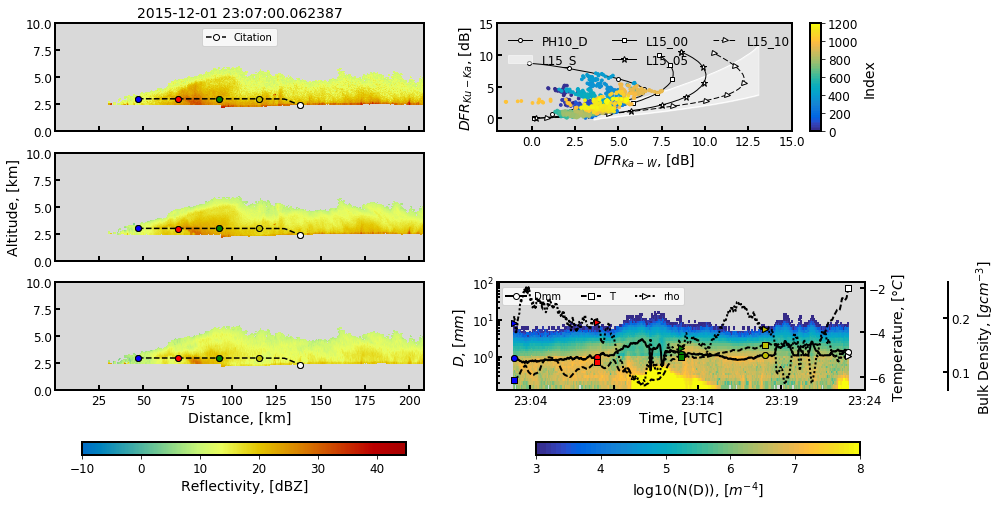

In [6]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_2_New.npy'
flightnum = 0 
fig1(filename,flightnum)

# December 1

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:168: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:171: RuntimeWarning: divide by zero encountered in log10


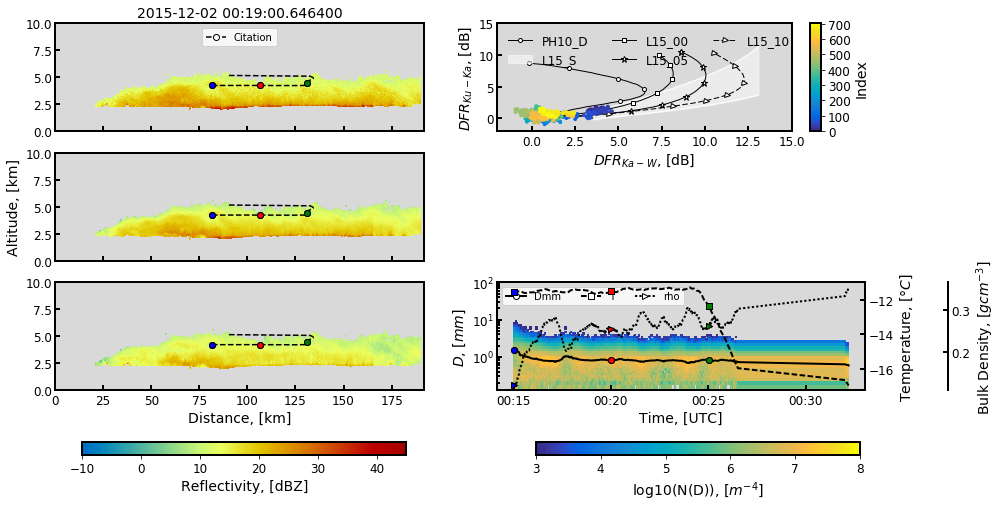

In [7]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_2_New.npy'
flightnum = 1 
fig1(filename,flightnum)

# Dec 2 (3rd flight)

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


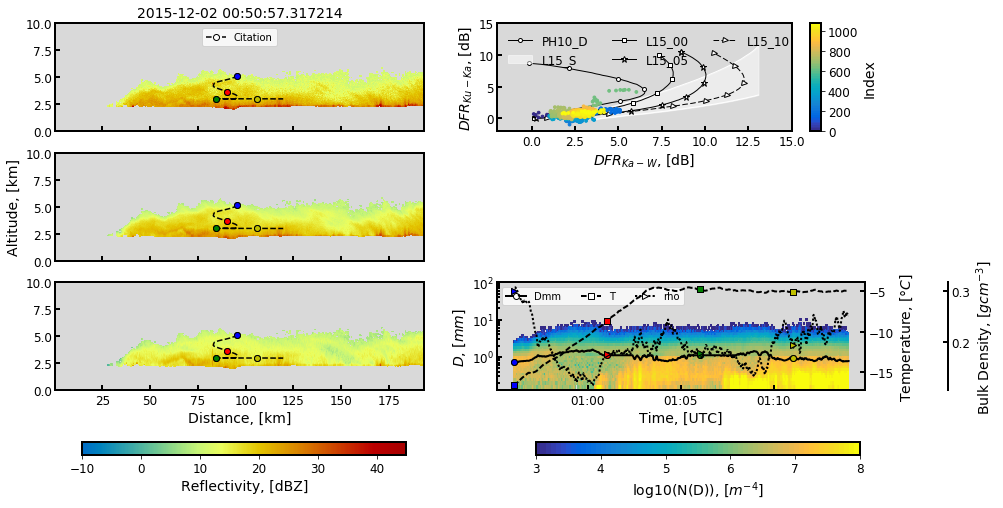

In [45]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_2_New.npy'
flightnum = 2 
fig1(filename,flightnum)

# Dec 3 15:09

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


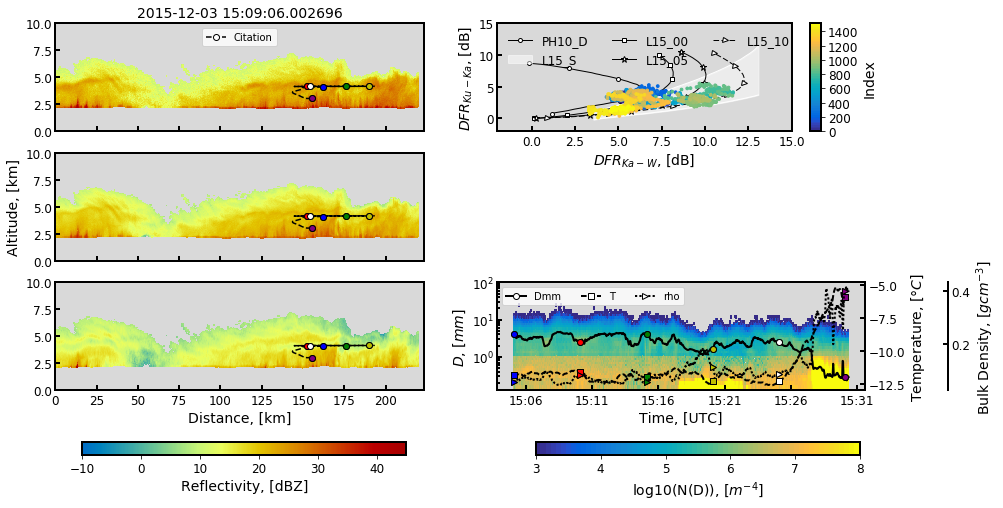

In [46]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_3_New.npy'
flightnum = 0
fig1(filename,flightnum)

# Dec 3 16:17

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


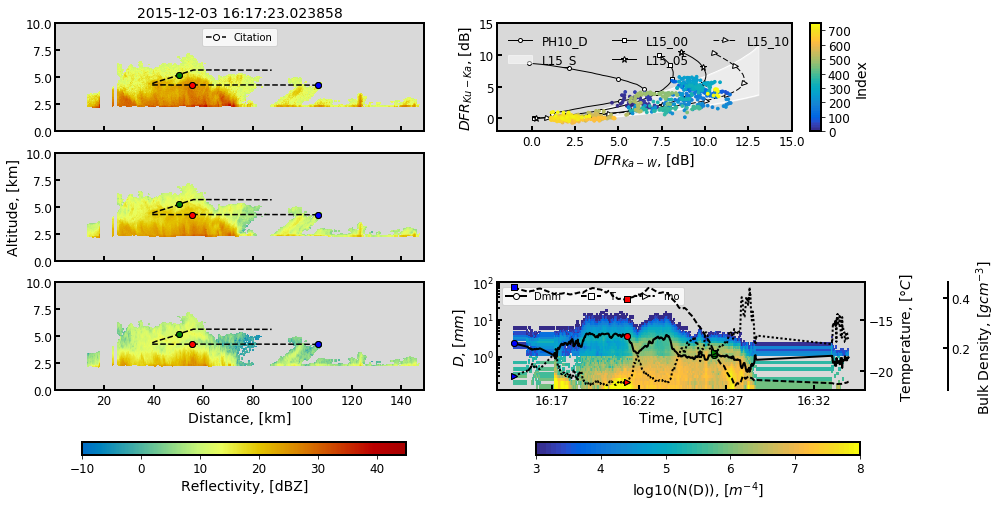

In [47]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_3_New.npy'
flightnum = 1
fig1(filename,flightnum)

# Dec 12 17:49

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


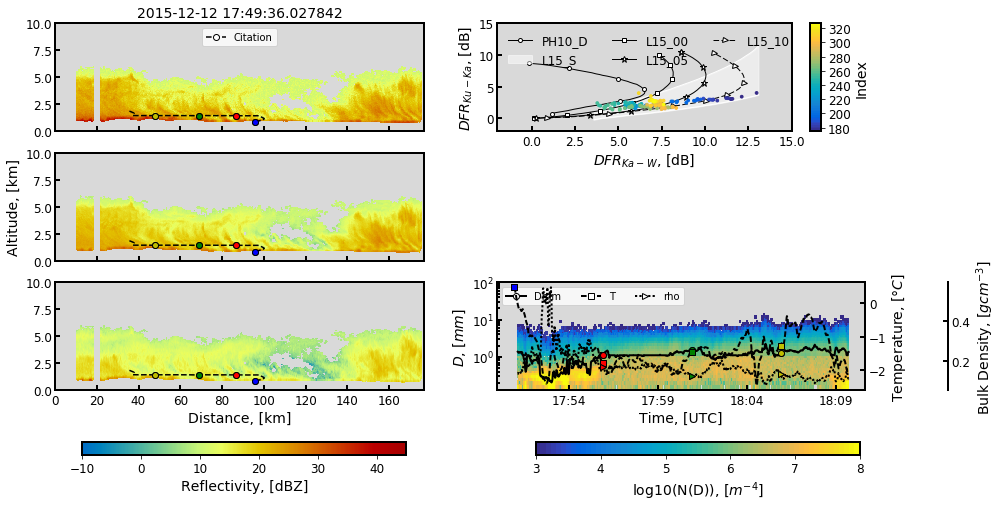

In [48]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_12_New.npy'
flightnum = 0
fig1(filename,flightnum)

# Dec 12 18:09

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


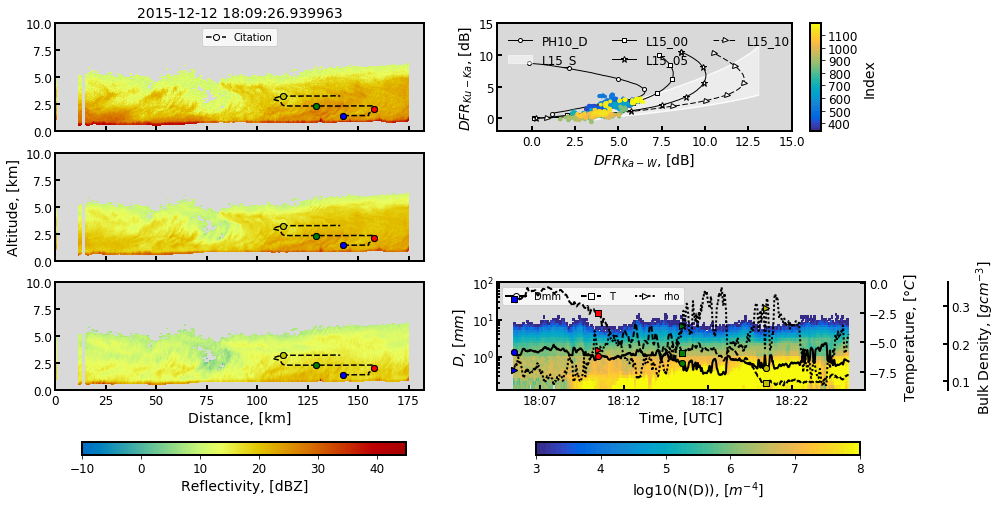

In [50]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_12_New.npy'
flightnum = 1
fig1(filename,flightnum)

# Dec 12 18:21

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


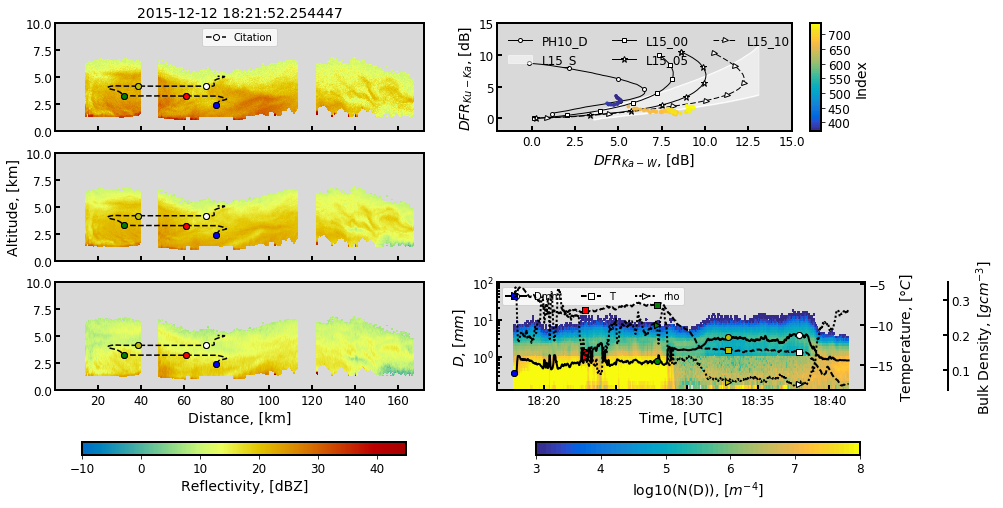

In [51]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_12_New.npy'
flightnum = 2
fig1(filename,flightnum)

# Dec 12 18:39

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


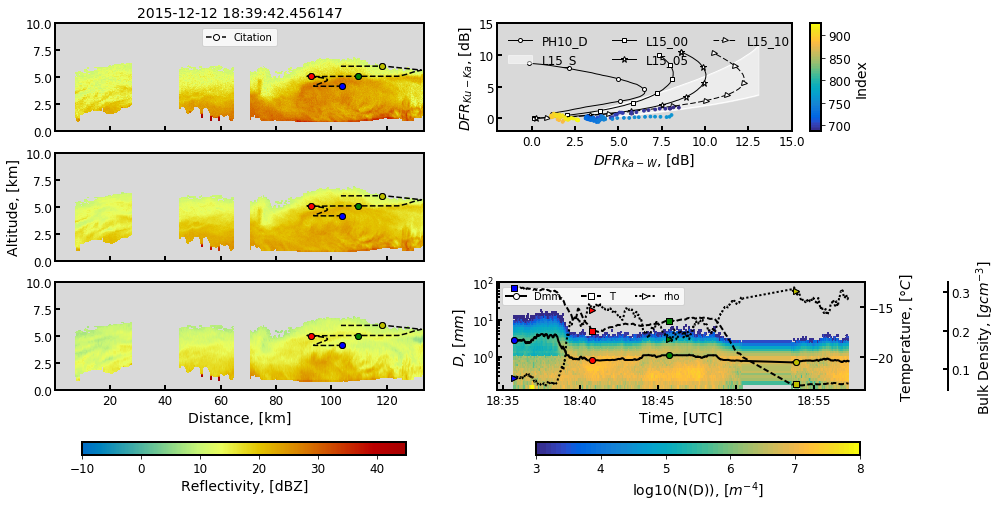

In [52]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_12_New.npy'
flightnum = 3
fig1(filename,flightnum)

# Dec 12 18:53

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


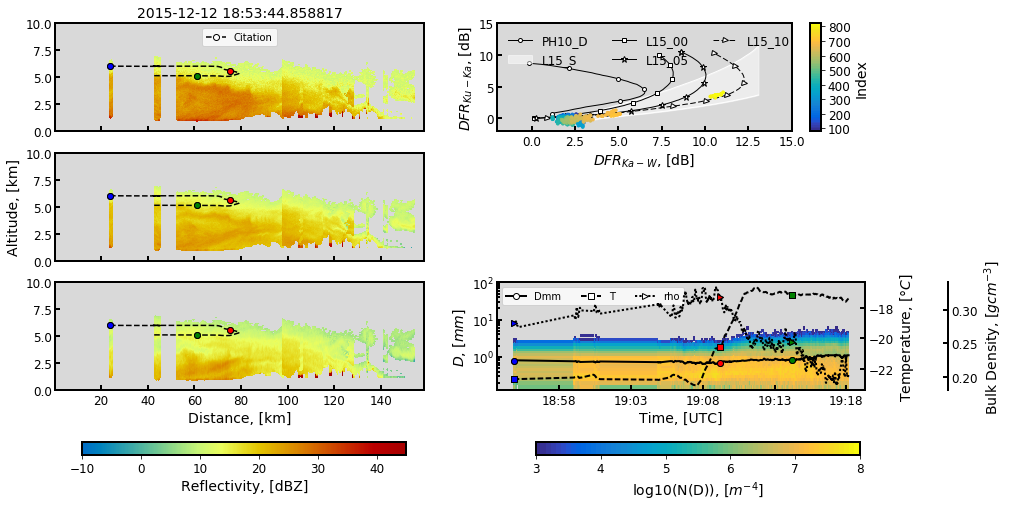

In [53]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_12_New.npy'
flightnum = 4
fig1(filename,flightnum)

# Dec 12 19:26

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


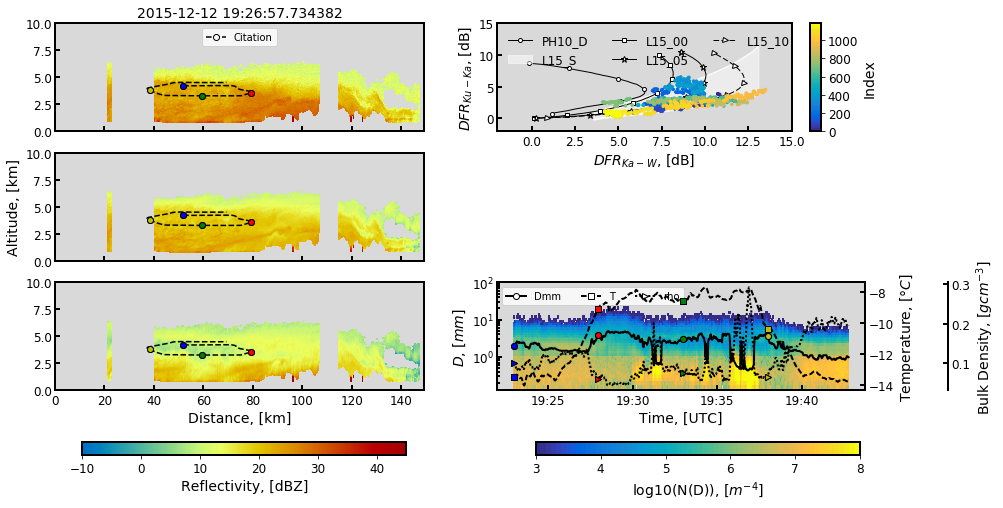

In [54]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_12_New.npy'
flightnum = 5
fig1(filename,flightnum)

# Dec 18 06:17

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:159: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: divide by zero encountered in log10


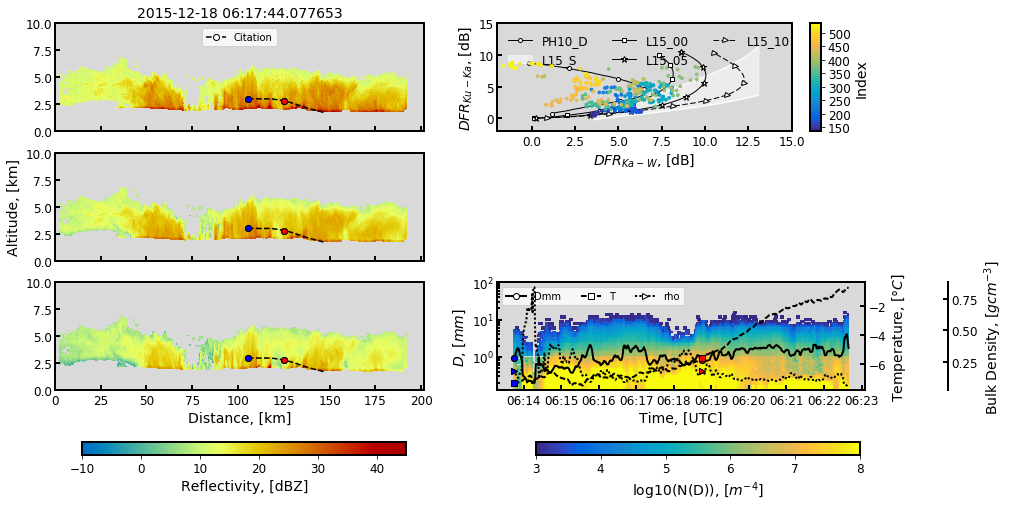

In [55]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_18_New.npy'
flightnum = 0
fig1(filename,flightnum)

# Dec 18 06:45

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__m

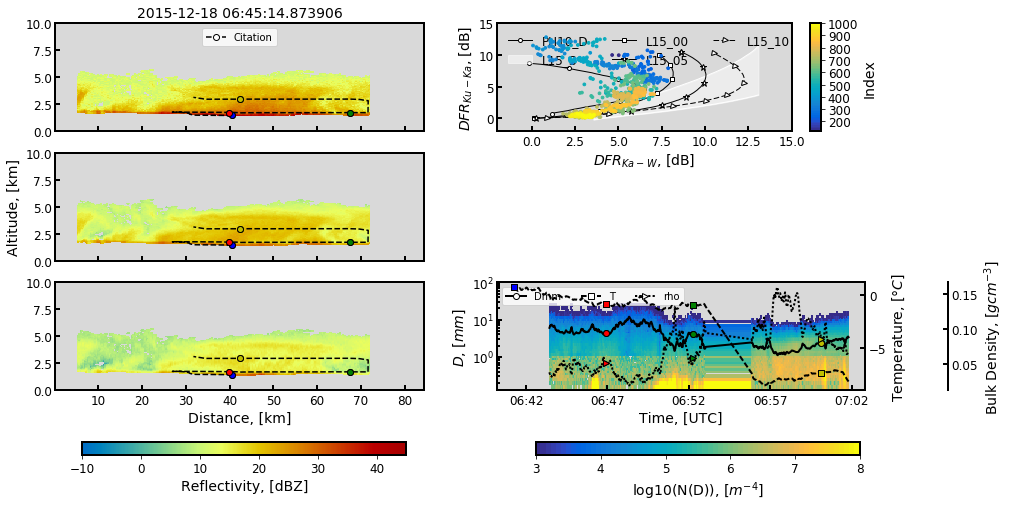

In [80]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_18_New.npy'
flightnum = 1
fig1(filename,flightnum)

# Dec 18 06:58

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:168: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:171: RuntimeWarning: divide by zero encountered in log10


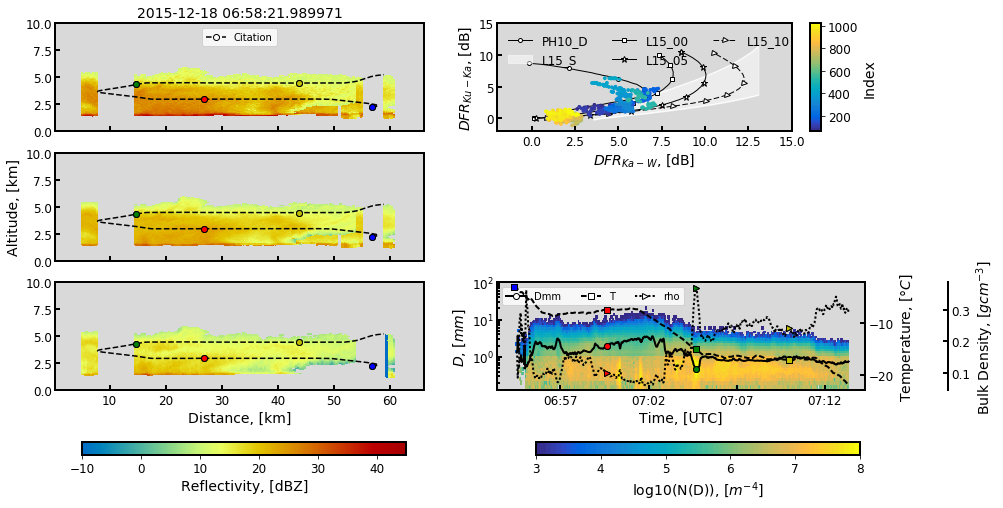

In [81]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_12_18_New.npy'
flightnum = 2
fig1(filename,flightnum)

# November 23

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:168: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:171: RuntimeWarning: divide by zero encountered in log10


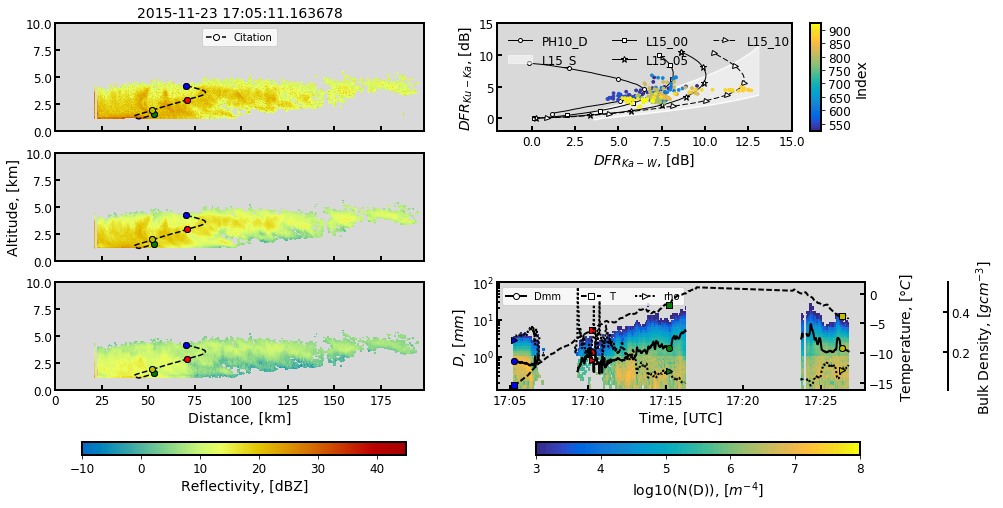

In [82]:
filename = '/data/gpm/a/randyjc2/OLYMPEX/MatchedFiles/Thirtygates/MatchedAPR_11_23_New.npy'
flightnum = 0
fig1(filename,flightnum)